This is a homework for Topic 3 of MLCourse.ai

https://www.kaggle.com/kashnitsky/a3-demo-decision-trees

In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install pydotplus

You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'd:\projects\olimps\python\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

# We will use the Seaborn library
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import pydotplus

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [4]:
sns.set_context(
    "notebook",
    font_scale=1.5,
    rc={
        "figure.figsize": (11, 8),
        "axes.titlesize": 18
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [5]:
# Create dataframe with dummy variables
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis = 1)
    out.drop(feature_list, axis = 1, inplace = True)
    return out

# Some feature values are present in train and absent in test and vice-versa.
def intersect_features(train, test):
    common_feat = list( set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [6]:
features = ['Looks', 'Alcoholic_beverage','Eloquence','Money_spent']

# noinspection PyDictCreation
df_train = {}
df_train['Looks'] = ['handsome', 'handsome', 'handsome', 'repulsive',
                         'repulsive', 'repulsive', 'handsome']
df_train['Alcoholic_beverage'] = ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes']
df_train['Eloquence'] = ['high', 'low', 'average', 'average', 'low',
                                   'high', 'average']
df_train['Money_spent'] = ['lots', 'little', 'lots', 'little', 'lots',
                                  'lots', 'lots']
df_train['Will_go'] = LabelEncoder().fit_transform(['+', '-', '+', '-', '-', '+', '+'])

df_train = create_df(df_train, features)
df_train


,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,1,0,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,1
3,1,0,1,1,0,1,0,0,1,0
4,1,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,1,0,0,1
6,0,1,0,0,1,1,0,0,0,1


In [7]:
# noinspection PyDictCreation
df_test = {}
df_test['Looks'] = ['handsome', 'handsome', 'repulsive']
df_test['Alcoholic_beverage'] = ['no', 'yes', 'yes']
df_test['Eloquence'] = ['average', 'high', 'average']
df_test['Money_spent'] = ['lots', 'little', 'lots']
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,1,0,1,0,1,0,0,1
1,1,0,0,1,0,1,1,0
2,0,1,0,1,1,0,0,1


In [8]:
# Some feature values are present in train and absent in test and vice-versa.
y = df_train['Will_go']
df_train, df_test = intersect_features(train=df_train, test=df_test)
df_train

,Money_spent_little,Eloquence_average,Alcoholic_beverage_no,Money_spent_lots,Looks_repulsive,Looks_handsome,Eloquence_high,Alcoholic_beverage_yes
0,0,0,0,1,0,1,1,1
1,1,0,0,0,0,1,0,1
2,0,1,1,1,0,1,0,0
3,1,1,1,0,1,0,0,0
4,0,0,0,1,1,0,0,1
5,0,0,0,1,1,0,1,1
6,0,1,0,1,0,1,0,1


In [9]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                  random_state=17)

clf_tree.fit(df_train.values, y.values)

tree_graph_to_png(tree=clf_tree, feature_names=df_train.columns,
                  png_file_to_save='topic3_decision_tree1.png')

In [10]:
def entropy(labels):
    unique_values, counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()
    return -(norm_counts * np.log2(norm_counts)).sum()

def relative_entropy(of, to):
    return len(of) / len(to) * entropy(of)

s0 = entropy(y)

s1_set = y[df_train['Looks_handsome'] == 1]
s1 = entropy(s1_set)

s2_set = y[df_train['Looks_handsome'] == 0]
s2 = entropy(s2_set)

ig = s0 - relative_entropy(s1_set, y) - relative_entropy(s2_set, y)

print(s0, s1, s2, ig)

0.9852281360342515 0.8112781244591328 0.9182958340544896 0.12808527889139443


In [11]:
balls = [0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1]
print(entropy(balls[:13]))
print(entropy([1, 2, 3, 4, 5, 6]))

0.9612366047228759
2.584962500721156


In [12]:
def information_gain(root, left, right):
    return entropy(root) - relative_entropy(left, root) - relative_entropy(right, root)

print(information_gain(balls, balls[:13], balls[13:]))

0.16088518841412436


In [13]:
data_train = pd.read_csv('../data/adult_train.csv')
data_test = pd.read_csv('../data/adult_test.csv')

# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target'] == ' <=50K.')]

# encode target variable as integer
data_train.loc[data_train['Target']==' <=50K', 'Target'] = 0
data_train.loc[data_train['Target']==' >50K', 'Target'] = 1

data_test.loc[data_test['Target']==' <=50K.', 'Target'] = 0
data_test.loc[data_test['Target']==' >50K.', 'Target'] = 1

data_test['Age'] = data_test['Age'].astype(int)

data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281.0,NaN,NaN,NaN,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


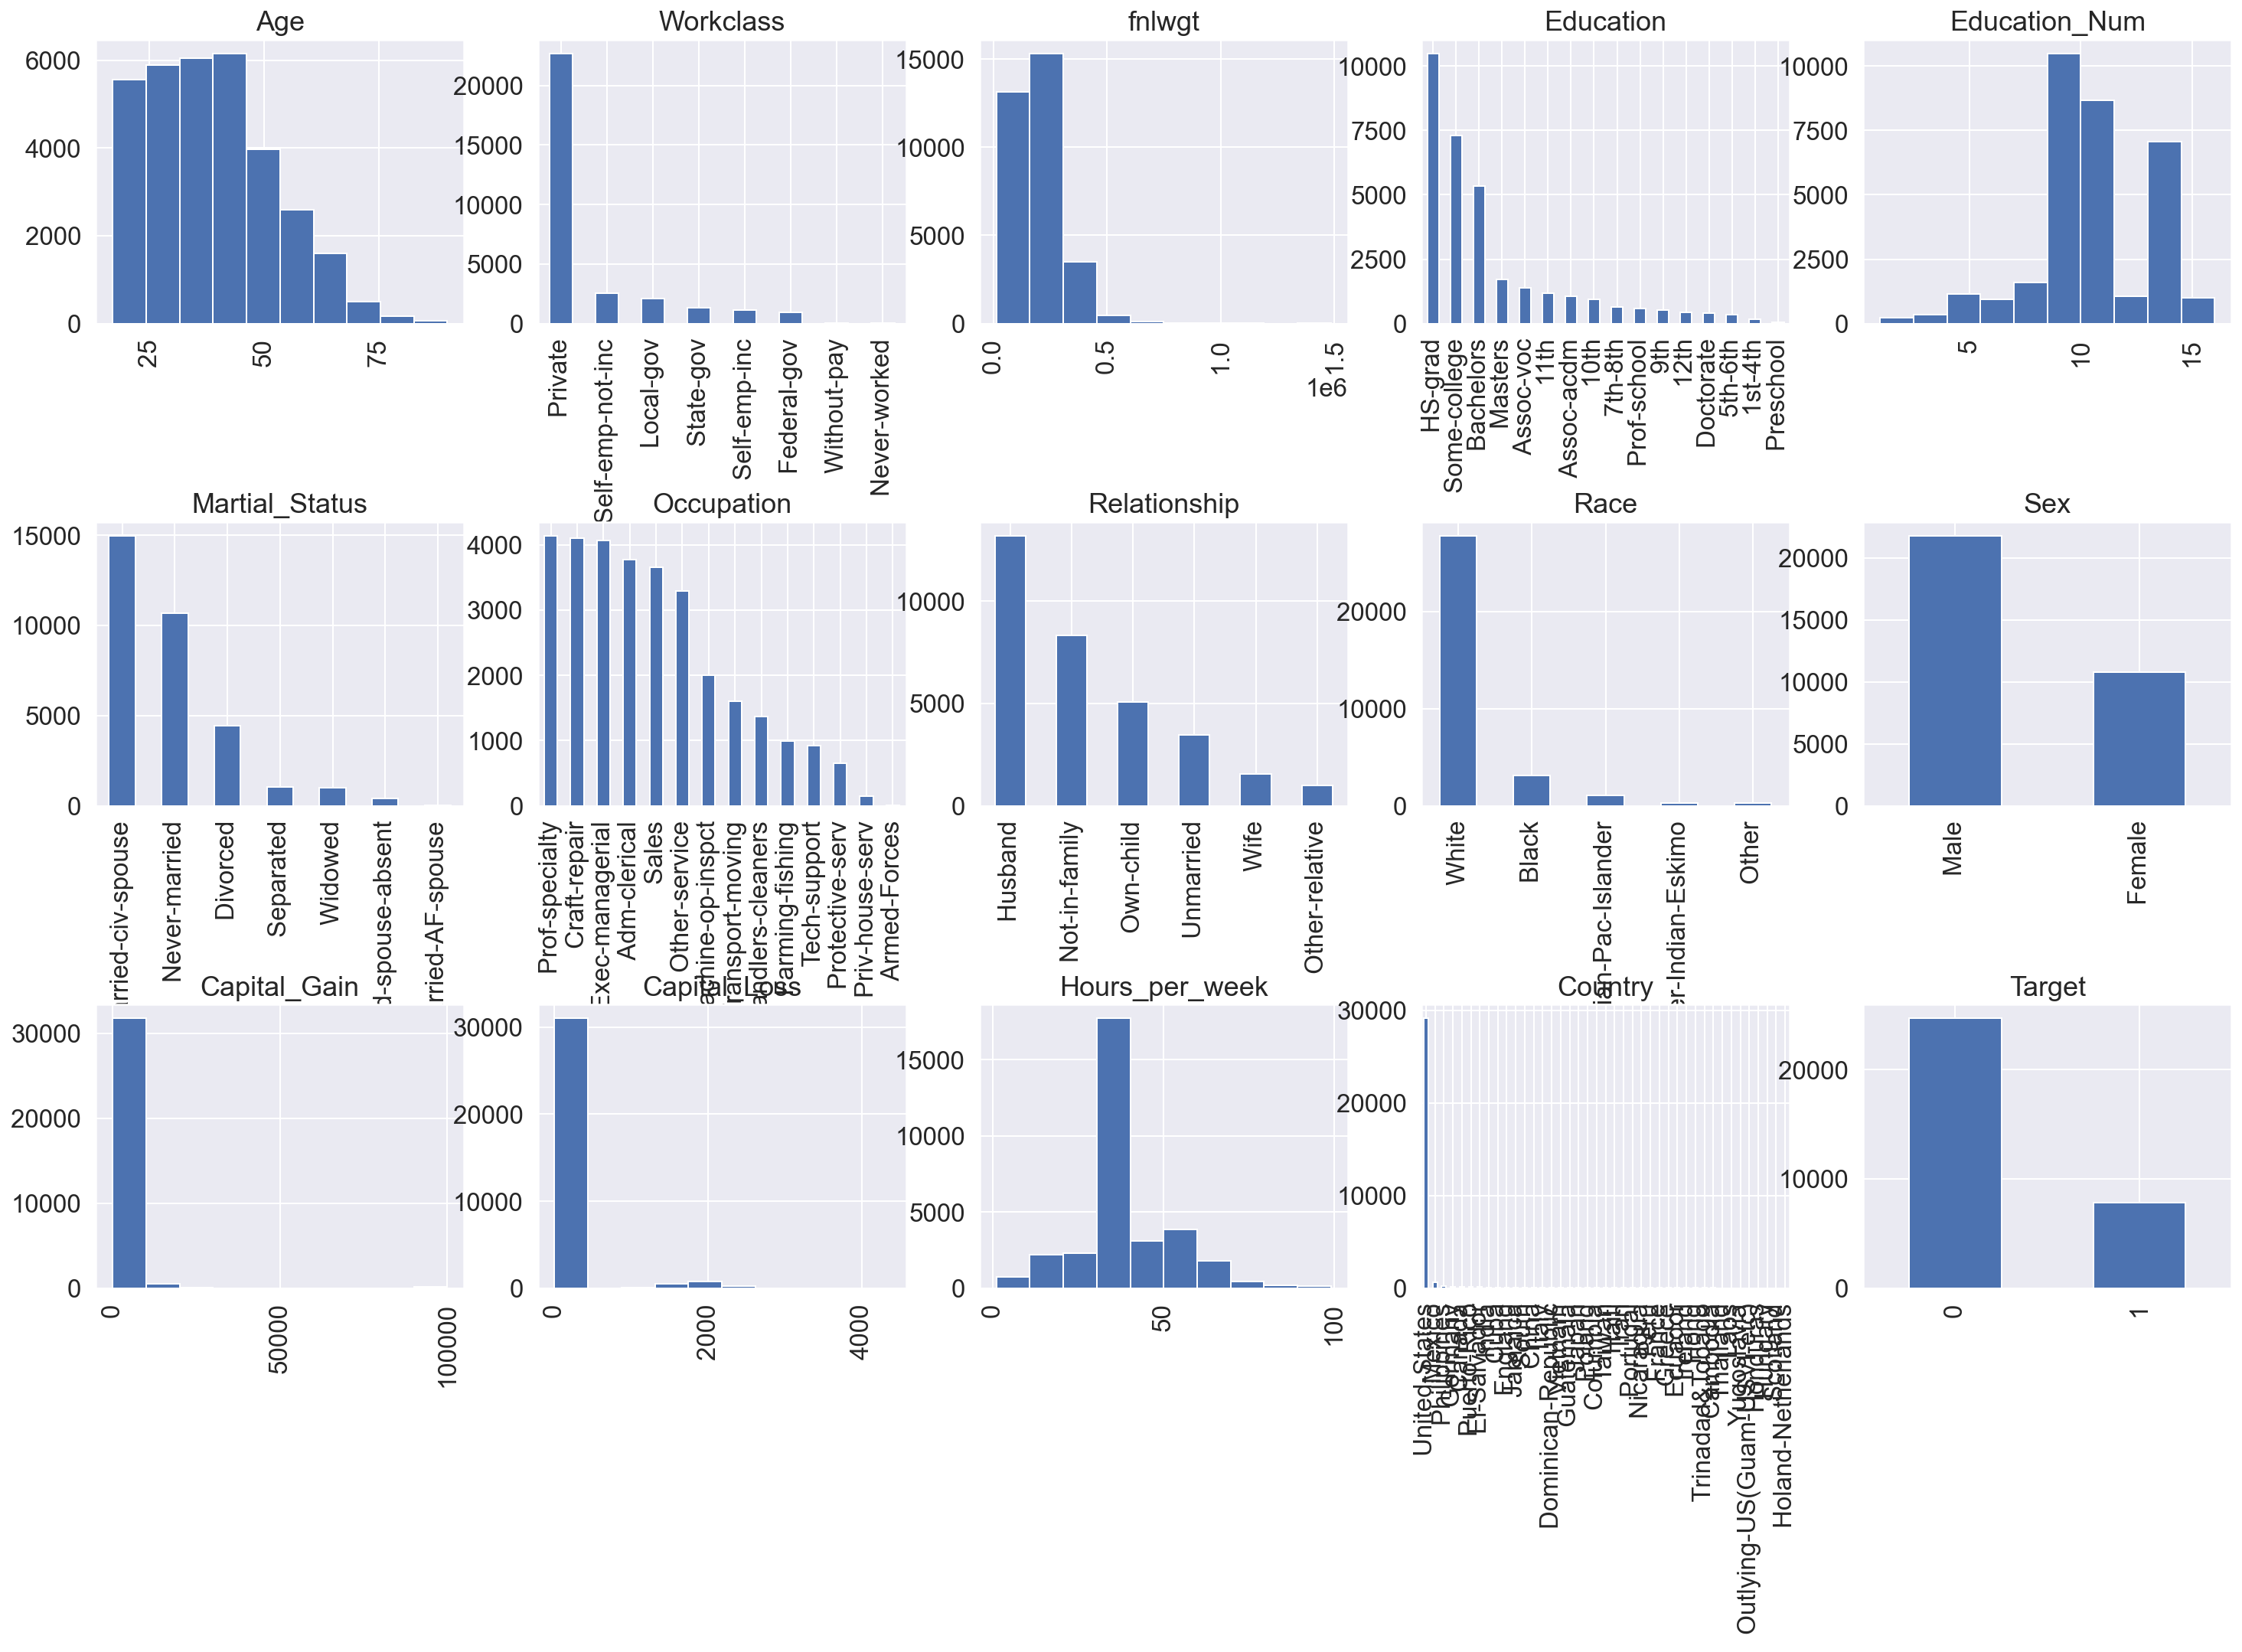

In [14]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [15]:
# choose categorical and continuous features from data

categorical_columns = [c for c in data_train.columns
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns
                     if data_train[c].dtype.name != 'object']

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)

for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

In [16]:
data_train = pd.concat([data_train[numerical_columns],
    pd.get_dummies(data_train[categorical_columns])], axis=1)

data_test = pd.concat([data_test[numerical_columns],
    pd.get_dummies(data_test[categorical_columns])], axis=1)

print(set(data_train.columns) - set(data_test.columns))
data_test['Country_ Holand-Netherlands'] = 0
print(set(data_train.columns) - set(data_test.columns))

{'Country_ Holand-Netherlands'}
set()


In [17]:
X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

In [18]:
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
tree_model.fit(X_train, y_train)

tree_predict = tree_model.predict(X_test)
print(accuracy_score(y_test, tree_predict))

tree_graph_to_png(tree=tree_model, feature_names=X_train.columns,
                  png_file_to_save='topic3_decision_tree2.png')

0.8447884036607088


In [19]:
# tree_train_params = {'max_depth': range(2,11)}
# best_tree = GridSearchCV(tree_model, tree_train_params, cv=5, n_jobs=-1)

# best_tree.fit(X_train, y_train)

# tree_predict = best_tree.predict(X_test)
# print(accuracy_score(y_test, tree_predict))

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=17)
tree_model.fit(X_train, y_train)

tree_predict = tree_model.predict(X_test)
print(accuracy_score(y_test, tree_predict))

tree_graph_to_png(tree=tree_model, feature_names=X_train.columns,
                  png_file_to_save='topic3_decision_tree3.png')

0.8479823106688779


KeyboardInterrupt: 